In [1]:
from keras.models import load_model
from IPython.display import Audio
import tensorflow as tf
import numpy as np
import librosa
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt
from scripts.predictions import *
from sklearn.metrics import mean_absolute_error


In [8]:
model = load_model('model/first-enhanced-data.hdf5')



In [9]:
import os
from IPython.display import clear_output

def snr(original, predicted):
    # Ensure both arrays have the same length
    min_length = min(len(original), len(predicted))
    original = original[:min_length]
    predicted = predicted[:min_length]
    
    noise = original - predicted
    signal_power = np.mean(original ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Directory containing the noisy and clean audio files
noisy_audio_dir = 'test/noisy_testset_wav/'
clean_audio_dir = 'test/clean_testset_wav/'

# Iterate through all files in the noisy audio directory
results = []
for filename in tqdm(os.listdir(noisy_audio_dir)[:100]):
    if filename.endswith('.wav'):
        noisy_audio_path = os.path.join(noisy_audio_dir, filename)
        clean_audio_path = os.path.join(clean_audio_dir, filename)
        
        noisy_audio = get_audio(noisy_audio_path)
        clean_audio = get_audio(clean_audio_path)
        
        pred = predict(noisy_audio_path, model, batching_size=12000)
        
        # Calculate SNR and MAE
        snr_value = snr(clean_audio, pred)
        # Ensure both arrays have the same length for MAE calculation
        min_length = min(len(clean_audio), len(pred))
        clean_audio = clean_audio[:min_length]
        pred = pred[:min_length]
        
        mae_value = mean_absolute_error(clean_audio, pred)
        
        results.append((filename, snr_value, mae_value))
        clear_output(wait=True)

# Optionally, you can print the results at the end
# Calculate average SNR and MAE
average_snr = np.mean([result[1] for result in results])
average_mae = np.mean([result[2] for result in results])

print(f'Average SNR: {average_snr:.2f}')
print(f'Average MAE: {average_mae:.4f}')

100%|██████████| 100/100 [01:27<00:00,  1.14it/s]

Average SNR: 3.13
Average MAE: 0.0475


In [7]:
import os
from IPython.display import clear_output
import soundfile as sf
from tqdm import tqdm

# Create predicted directory
predicted_dir = 'test/predicted_testset_wav/'
os.makedirs(predicted_dir, exist_ok=True)
noisy_audio_dir = 'data/noisy_testset_wav/'
clean_audio_dir = 'data/clean_testset_wav/'
def snr(original, predicted):
    # Ensure both arrays have the same length
    min_length = min(len(original), len(predicted))
    original = original[:min_length]
    predicted = predicted[:min_length]
    
    noise = original - predicted
    signal_power = np.mean(original ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)
# Iterate through files and save predictions
results = []
for filename in tqdm(os.listdir(noisy_audio_dir)[:350]):
    if filename.endswith('.wav'):
        noisy_audio_path = os.path.join(noisy_audio_dir, filename)
        clean_audio_path = os.path.join(clean_audio_dir, filename)
        
        noisy_audio = get_audio(noisy_audio_path)
        clean_audio = get_audio(clean_audio_path)
        
        pred = predict(noisy_audio_path, model, batching_size=12000)
        
        # Save predicted audio
        predicted_path = os.path.join(predicted_dir, filename)
        sf.write(predicted_path, pred, 16000)
        
        # Calculate metrics
        snr_value = snr(clean_audio, pred)
        min_length = min(len(clean_audio), len(pred))
        mae_value = mean_absolute_error(clean_audio[:min_length], pred[:min_length])
        
        results.append((filename, snr_value, mae_value))
        clear_output(wait=True)

average_snr = np.mean([result[1] for result in results])
average_mae = np.mean([result[2] for result in results])

print(f'Average SNR: {average_snr:.2f}')
print(f'Average MAE: {average_mae:.4f}')
print(f'Predicted files saved to: {predicted_dir}')

100%|██████████| 350/350 [01:39<00:00,  3.54it/s]

Average SNR: -4.51
Average MAE: 0.0662
Predicted files saved to: test/predicted_testset_wav/


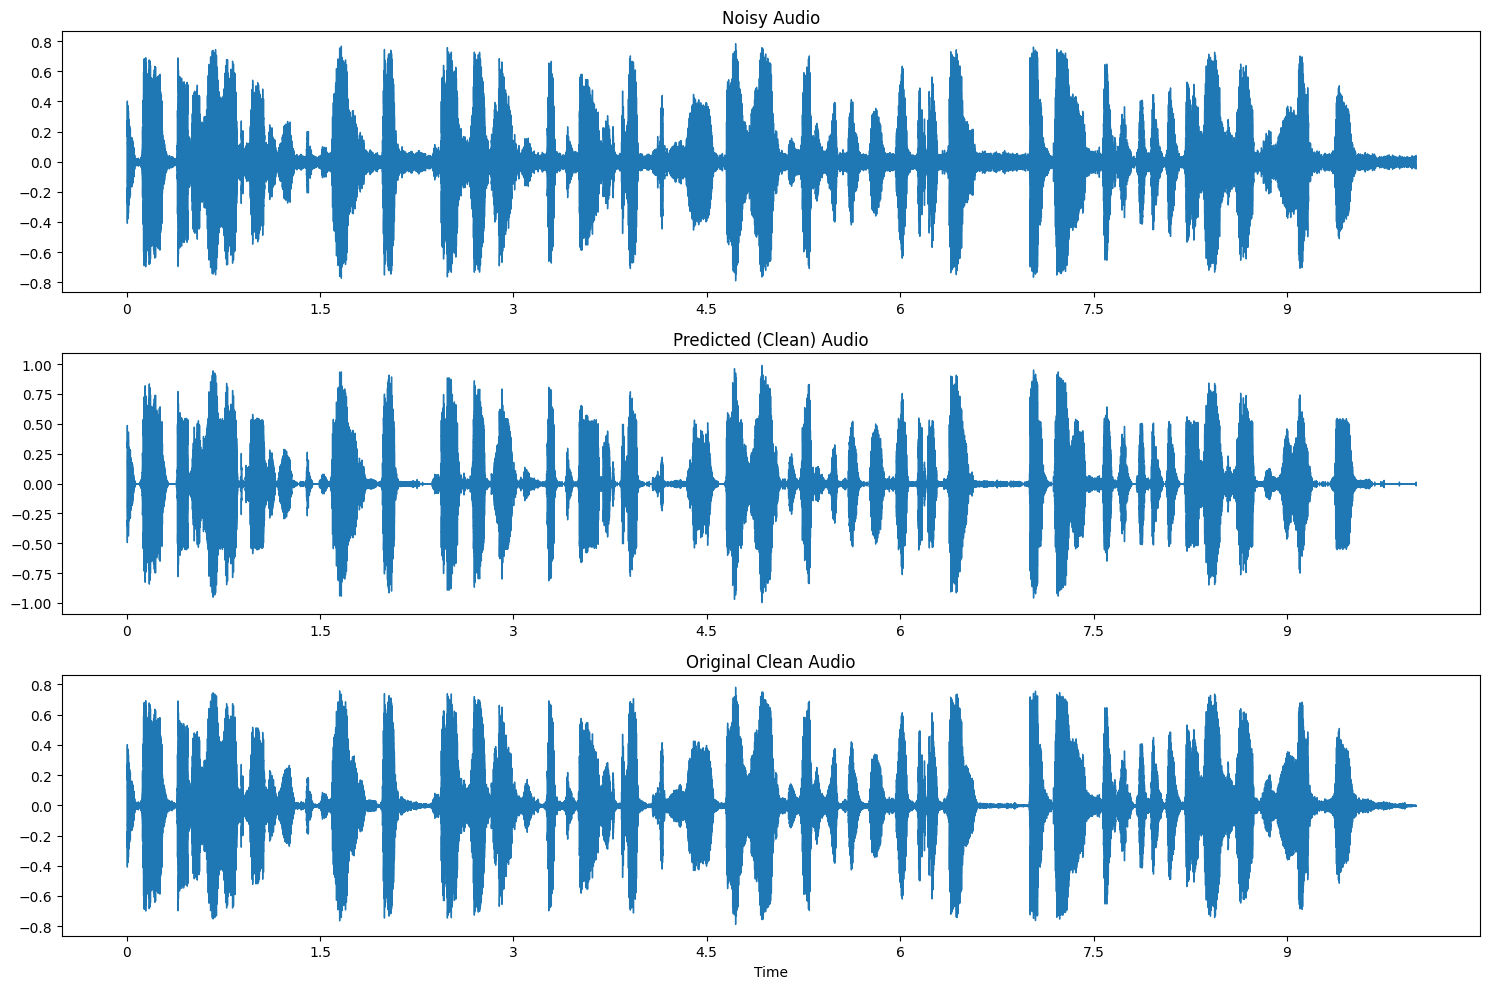

In [4]:
import matplotlib.pyplot as plt
import librosa.display

def plot_waveforms(noisy_path, predicted_audio, clean_path=None):
    # Load audio files
    noisy_audio = get_audio(noisy_path)
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
    
    # Plot noisy audio
    librosa.display.waveshow(noisy_audio, sr=16000, ax=axes[0])
    axes[0].set_title('Noisy Audio')
    axes[0].set_xlabel('')
    
    # Plot predicted audio
    librosa.display.waveshow(predicted_audio, sr=16000, ax=axes[1])
    axes[1].set_title('Predicted (Clean) Audio')
    axes[1].set_xlabel('')
    
    # Plot clean audio if provided
    if clean_path:
        clean_audio = get_audio(clean_path)
        librosa.display.waveshow(clean_audio, sr=16000, ax=axes[2])
        axes[2].set_title('Original Clean Audio')
    
    plt.tight_layout()
    plt.show()

# Usage:
noisy_path = "test/noisy_testset_wav/1.wav"
clean_path = "test/clean_testset_wav/1.wav"  # Optional
predicted = predict(noisy_path, model)
plot_waveforms(noisy_path, predicted, clean_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


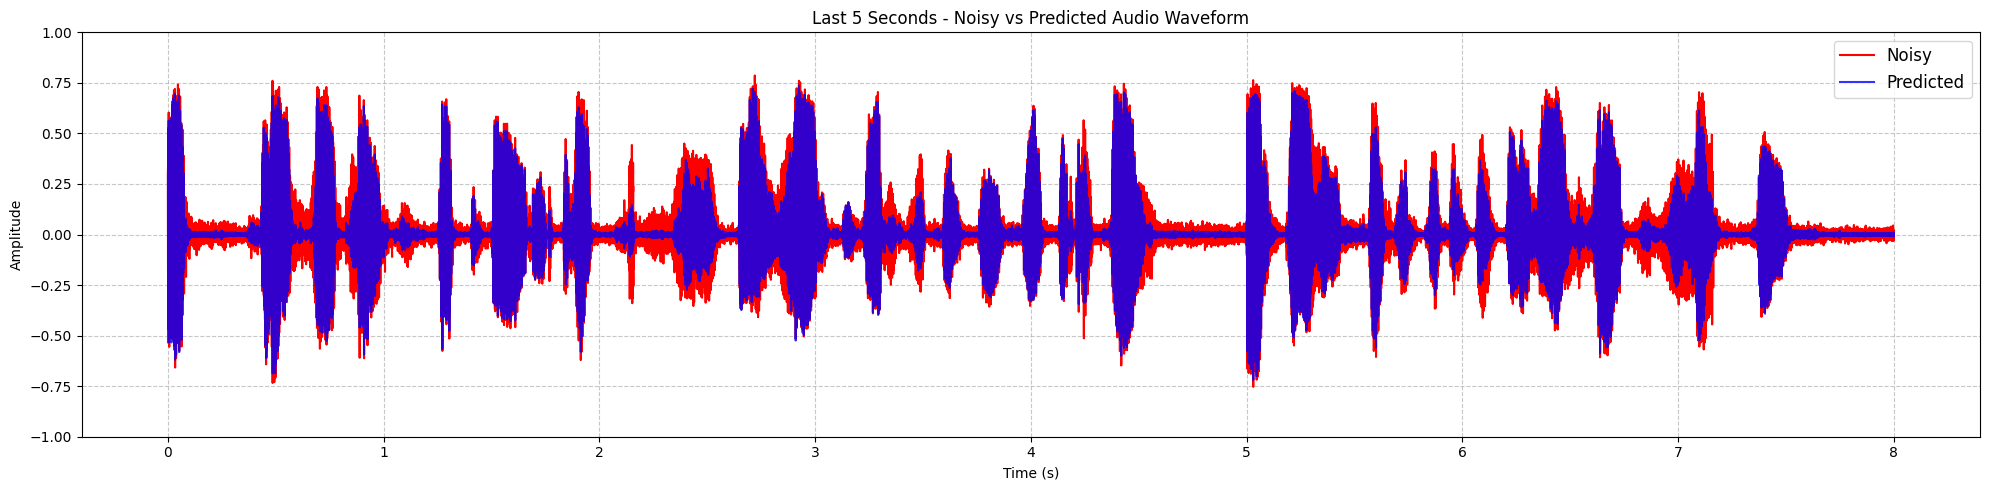

In [4]:
def plot_comparison_waveforms(noisy_path, predicted_audio):
    # Load noisy audio
    noisy_audio = get_audio(noisy_path)
    
    # Calculate last 5 seconds
    samples_per_5sec = 16000 * 8
    start_idx = max(0, len(noisy_audio) - samples_per_5sec)
    
    # Get last 5 seconds of audio
    noisy_segment = noisy_audio[start_idx:]
    predicted_segment = predicted_audio[start_idx:]
    
    # Create figure with increased size
    plt.figure(figsize=(20, 5))
    
    # Plot both waveforms with increased y-scale
    time = np.arange(len(noisy_segment)) / 16000
    plt.plot(time, noisy_segment, 'r-', alpha=1.0, label='Noisy')
    plt.plot(time, predicted_segment, 'b-', alpha=0.8, label='Predicted')
    
    plt.title('Last 5 Seconds - Noisy vs Predicted Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.ylim(-1.0, 1.0)  # Increased y-axis scale
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Usage:
noisy_path = "test/noisy_testset_wav/1.wav"
predicted = predict2(noisy_path, model)
plot_comparison_waveforms(noisy_path, predicted)

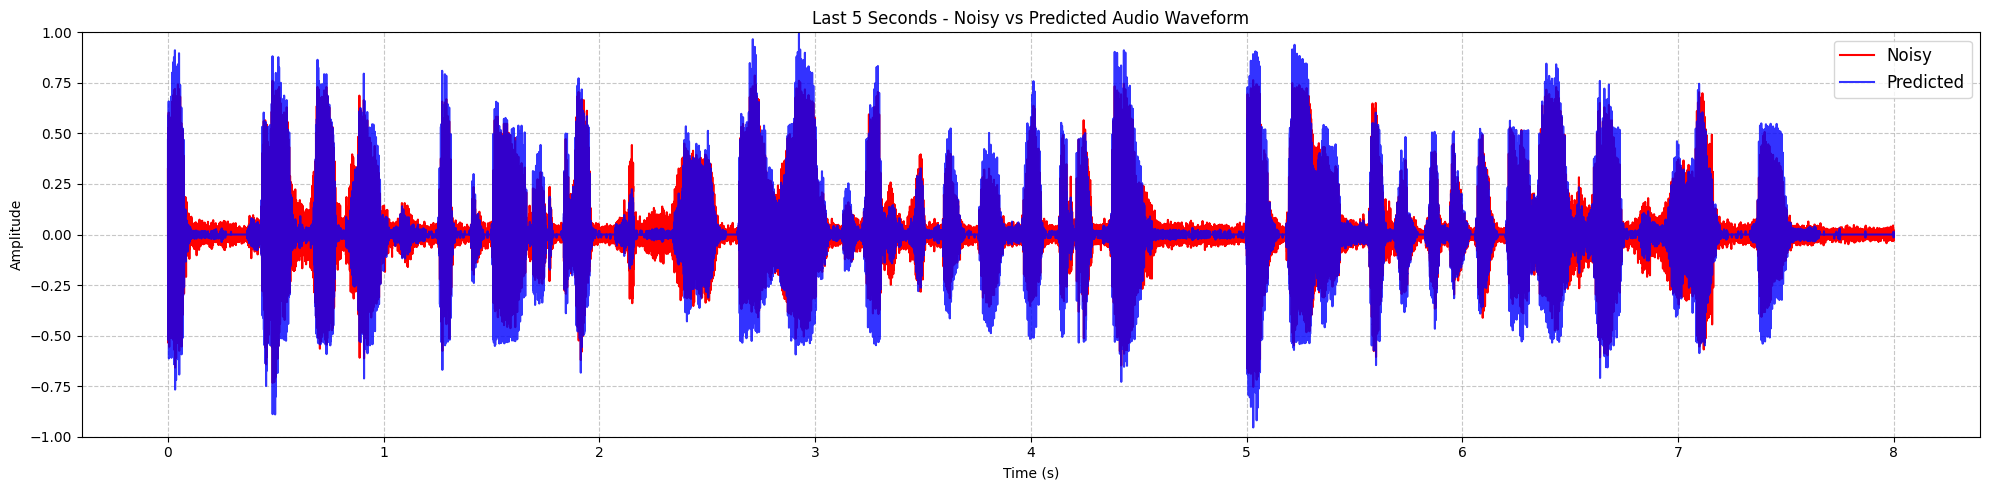

In [5]:
noisy_path = "test/noisy_testset_wav/1.wav"
predicted = predict(noisy_path, model)
plot_comparison_waveforms(noisy_path, predicted)

first
Average SNR: 16.01
Average MAE: 0.0086

# Calculate on Tflite

In [21]:
import os
from IPython.display import clear_output
noisy_audio_dir = 'data/noisy_testset_wav/'
clean_audio_dir = 'data/clean_testset_wav/'
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='model/quantized_model.tflite')
interpreter.allocate_tensors()
def snr(original, predicted):
    # Ensure both arrays have the same length
    min_length = min(len(original), len(predicted))
    original = original[:min_length]
    predicted = predicted[:min_length]
    
    noise = original - predicted
    signal_power = np.mean(original ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to make predictions with TFLite model
def predict_tflite(audio_path, interpreter, input_details, output_details):
    audio = get_audio(audio_path)
    # Ensure the audio data matches the expected input shape
    expected_length = input_details[0]['shape'][1]
    if len(audio) > expected_length:
        audio = audio[:expected_length]
    elif len(audio) < expected_length:
        audio = np.pad(audio, (0, expected_length - len(audio)), 'constant')
    
    input_data = np.expand_dims(audio, axis=(0, -1)).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data.flatten()

# Test the TFLite model on the same dataset
results_tflite = []
for filename in os.listdir(noisy_audio_dir)[:100]:
    if filename.endswith('.wav'):
        noisy_audio_path = os.path.join(noisy_audio_dir, filename)
        clean_audio_path = os.path.join(clean_audio_dir, filename)
        
        noisy_audio = get_audio(noisy_audio_path)
        clean_audio = get_audio(clean_audio_path)
        
        pred_tflite = predict_tflite(noisy_audio_path, interpreter, input_details, output_details)
        
        # Calculate SNR and MAE
        snr_value_tflite = snr(clean_audio, pred_tflite)
        min_length = min(len(clean_audio), len(pred_tflite))
        clean_audio = clean_audio[:min_length]
        pred_tflite = pred_tflite[:min_length]
        
        mae_value_tflite = mean_absolute_error(clean_audio, pred_tflite)
        
        results_tflite.append((filename, snr_value_tflite, mae_value_tflite))
        clear_output(wait=True)

# Calculate average SNR and MAE for TFLite model
average_snr_tflite = np.mean([result[1] for result in results_tflite])
average_mae_tflite = np.mean([result[2] for result in results_tflite])

print(f'Average SNR (TFLite): {average_snr_tflite:.2f}')
print(f'Average MAE (TFLite): {average_mae_tflite:.4f}')

Average SNR (TFLite): 13.53
Average MAE (TFLite): 0.0066
